# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
#pip install citipy done

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
name=[]       
cloud=[]      
ctry=[]      
date=[]     
humi=[]        
lat=[]      
lng=[]      
maxtemp=[]   
wind=[]         

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'url + "appid=" + api_key + "&q=" + city'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord'] ['lat']
        city_lng = city_weather ['coord'] ['lon']
        city_max_temp = city_weather ['main']['temp']
        city_humidity = city_weather ['main']['humidity']
        city_clouds = city_weather  ['clouds']['all']
        city_wind = city_weather  ['wind']['speed']
        city_country = city_weather ['country']['sys']
        city_date = city_weather ['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuatapere
City not found. Skipping...
Processing Record 2 of Set 1 | vostok
City not found. Skipping...
Processing Record 3 of Set 1 | albany
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 5 of Set 1 | gimli
City not found. Skipping...
Processing Record 6 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 7 of Set 1 | honiara
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
City not found. Skipping...
Processing Record 9 of Set 1 | poum
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
City not found. Skipping...
Processing Record 11 of Set 1 | upernavik
City not found. Skipping...
Processing Record 12 of Set 1 | saint-pierre
City not found. Skipping...
Processing Record 13 of Set 1 | ulladulla
City not found. Skipping...
Processing Record 14 of Set 1 | basco
City not found

In [43]:
# Convert the cities weather data into a Pandas DataFrame
cities_dict = {
    "City":city,
    "Cloudiness":cloud,
    "Country":ctry,
    "Date":date,
    "Humidity":humi,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temp":maxtemp,
    "Wind Speed":wind
}

In [49]:
# Show Record Count
cities_df=pd.DataFrame(cities_dict)
cities_df.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Latitude      0
Longitude     0
Max Temp      0
Wind Speed    0
dtype: int64

In [50]:
# Display sample data
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [58]:
# Export the City_Data into a csv
cities_df.to_csv(index=False)

'City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed\r\n'

In [68]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

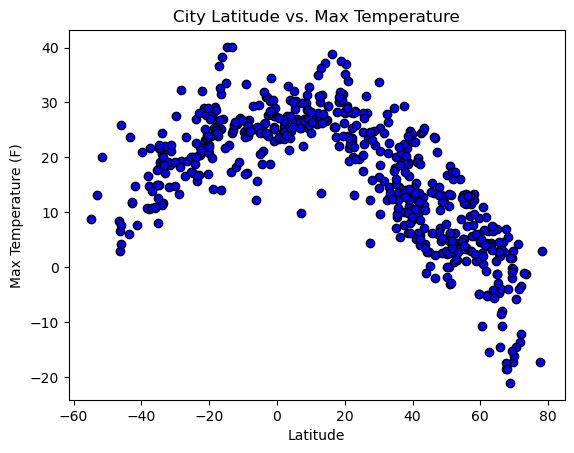

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

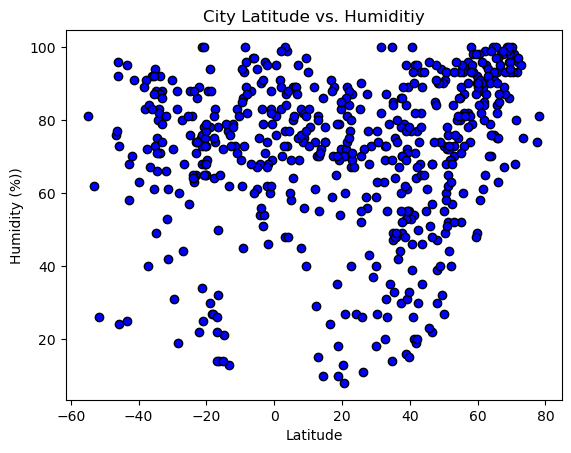

In [83]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humiditiy')
plt.ylabel('Humidity (%))')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

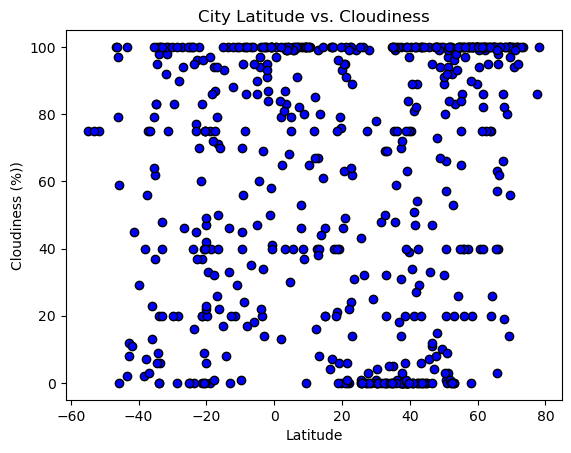

In [84]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%))')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

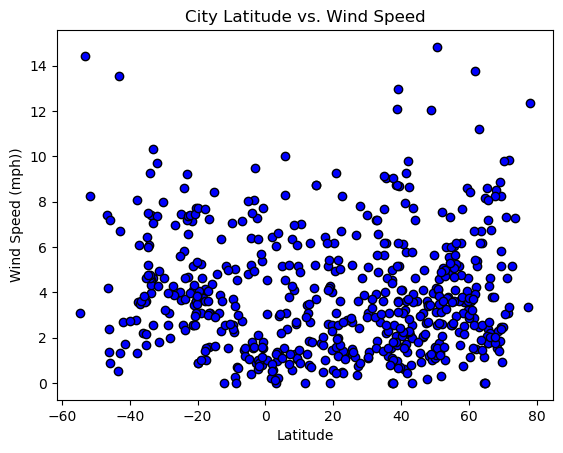

In [85]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph))')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


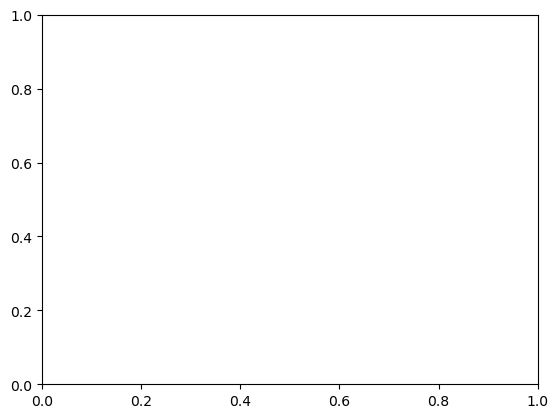

In [91]:
# Define a function to create Linear Regression plots
fig1, ax1 = plt.subplots()

In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

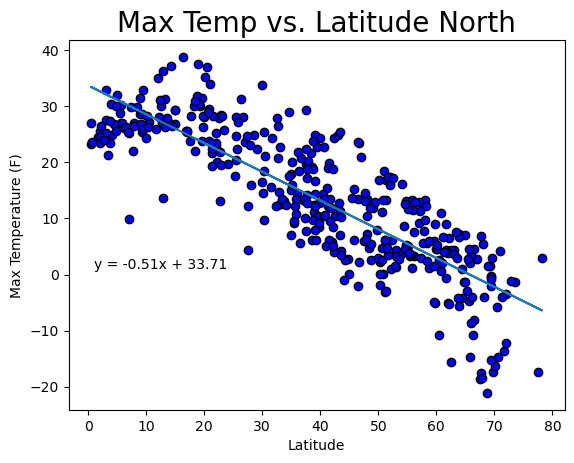

In [116]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Max Temp vs. Latitude North', fontsize=20)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(1, 1))

# Save the figure:
plt.savefig('../output_data/City Latitude vs. TempNorth.png')

# Show plot:
plt.show()

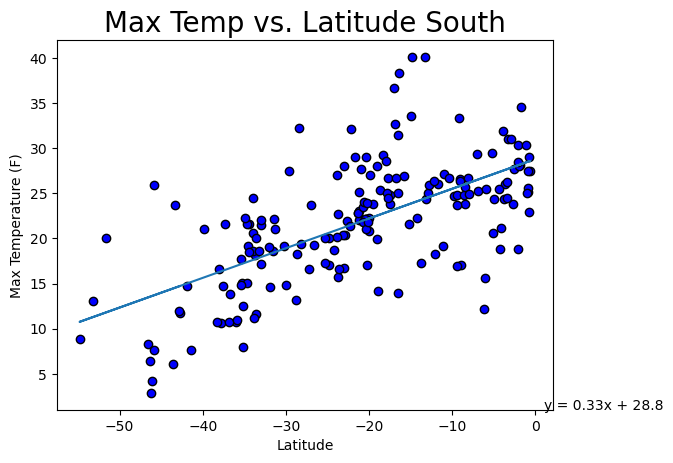

In [120]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Max Temp vs. Latitude South', fontsize=20)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(1, 1))

# Save the figure:
plt.savefig('../output_data/City Latitude vs. TempSouth.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

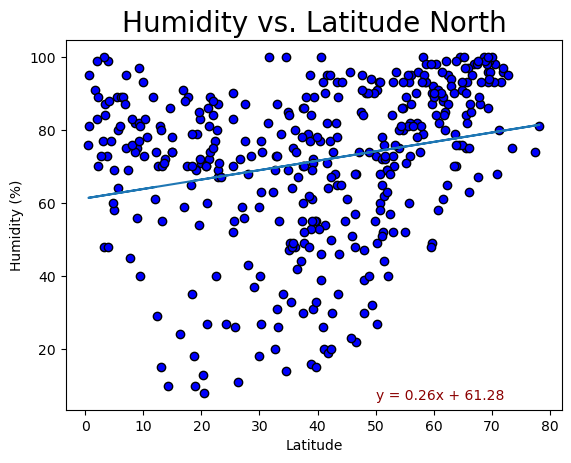

In [132]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Humidity vs. Latitude North', fontsize=20)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,6), color='darkred')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. HumidityNorth.png')

# Show plot:
plt.show()

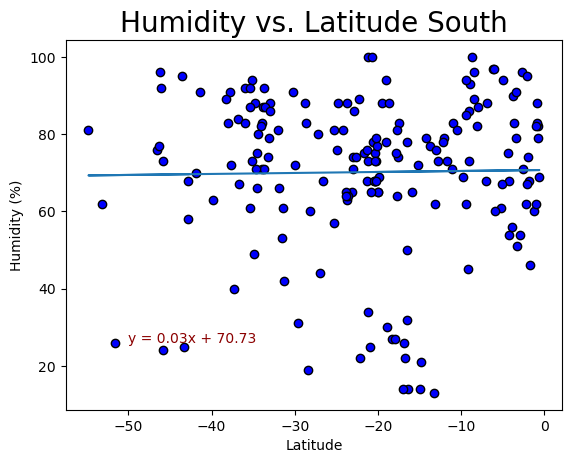

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Humidity vs. Latitude South', fontsize=20)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,26), color='darkred')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. HumiditySouth.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

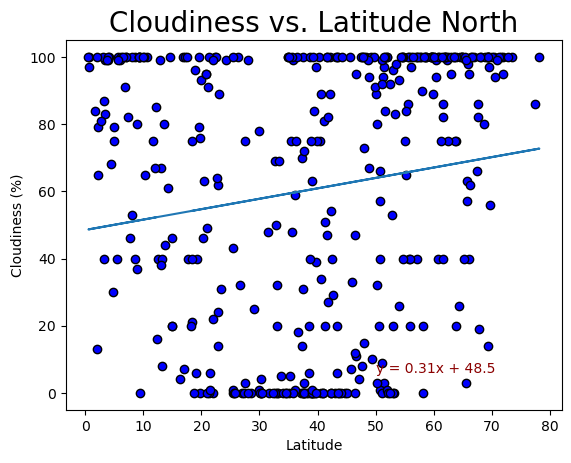

In [134]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Cloudiness vs. Latitude North', fontsize=20)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,6), color='darkred')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. CloudinessNorth.png')

# Show plot:
plt.show()

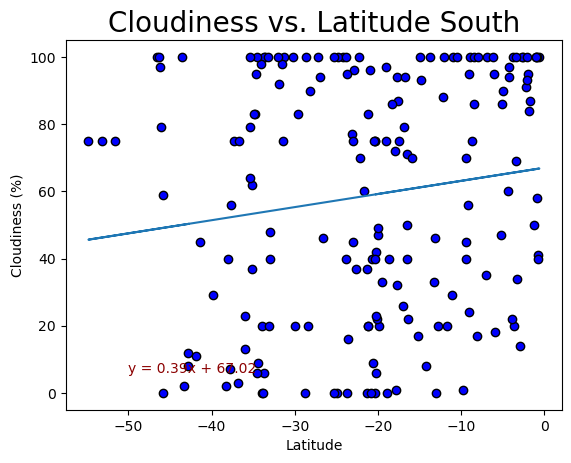

In [137]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Cloudiness vs. Latitude South', fontsize=20)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,6), color='darkred')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. CloudinessSouth.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

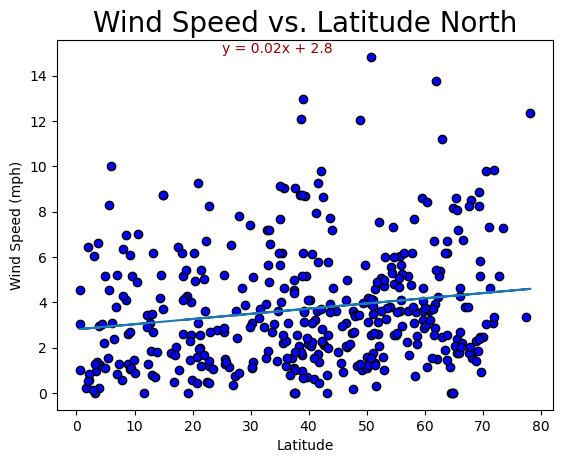

In [149]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Wind Speed vs. Latitude North', fontsize=20)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(25,15), color='darkred')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. WindSpeedNorth.png')

# Show plot:
plt.show()

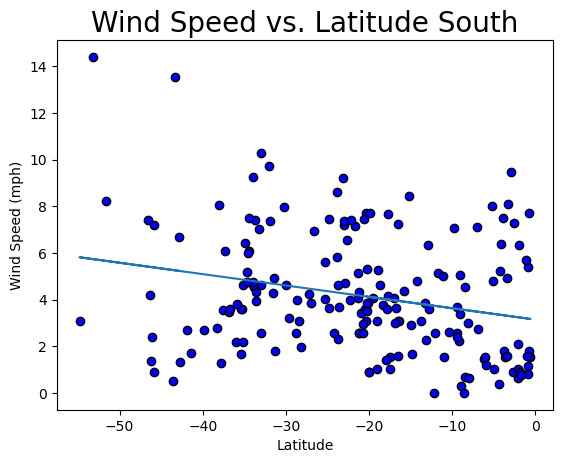

In [150]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot:
plt.scatter(x_values,y_values, marker='o', color='blue', edgecolors='black')
plt.plot(x_values,regress_values)

# Incorporate the other graph properties:
plt.title('Wind Speed vs. Latitude South', fontsize=20)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(25,15), color='darkred')

# Save the figure:
plt.savefig('../output_data/City Latitude vs. WindSpeedSouth.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [151]:
#The linear regression for temp and latitude are oppsosites with northern hemisphere having a 
#negative slope and southern having a positive slope

In [153]:
#The slopes for humidity vs. latitude were similar with plotted points all around the line

In [152]:
#Cloudiness and latitude were both positive sloping up with some points clustered at the top of the graph

In [ ]:
#Wind Speed graphs showed positive slope for Northern and negative for Southern, but more clustered
#points near the Northern hemisphere slope